In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(f'/content/drive/MyDrive/dataset/bbc-text.csv')
df.reset_index(drop=True, inplace=True)
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [ ]:
label_count=len(pd.get_dummies(df['category']).columns.values)
label_count

5

In [ ]:
news_train,news_test,label_train,label_test=train_test_split(df['text'].values,df['category'].values,test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token='--')
tokenizer.fit_on_texts(news_train)
train_sequences = tokenizer.texts_to_sequences(news_train)
train_padded = pad_sequences(train_sequences, maxlen=300, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(news_test)
test_padded = pad_sequences(test_sequences, maxlen=300, padding='post', truncating='post')


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df['category'].values)

train_label_seq = np.array(label_tokenizer.texts_to_sequences(label_train))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(label_test))


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and  logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = [myCallback()]

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# perbedaan categorical_crossentropy dengan sparse categorical crossentrophy
# kalo cate itu labelnya [[0,0,0,1],[0,1,0,0],[0,1,0,0]] kalo sparse [[4],[3],[1]] lebih enak sparse eak
  

In [ ]:
num_epochs = 15
history = model.fit(train_padded, train_label_seq, epochs=num_epochs, 
                    validation_data=(test_padded , test_label_seq), verbose=2,batch_size=128,callbacks=callbacks)

Epoch 1/15
14/14 - 14s - loss: 1.7667 - accuracy: 0.2146 - val_loss: 1.7170 - val_accuracy: 0.2090
Epoch 2/15
14/14 - 10s - loss: 1.6637 - accuracy: 0.2382 - val_loss: 1.5851 - val_accuracy: 0.2944
Epoch 3/15
14/14 - 10s - loss: 1.5910 - accuracy: 0.2938 - val_loss: 1.5304 - val_accuracy: 0.3438
Epoch 4/15
14/14 - 10s - loss: 1.4579 - accuracy: 0.3725 - val_loss: 1.4111 - val_accuracy: 0.3933
Epoch 5/15
14/14 - 10s - loss: 1.3398 - accuracy: 0.4258 - val_loss: 1.1071 - val_accuracy: 0.5528
Epoch 6/15
14/14 - 10s - loss: 1.0113 - accuracy: 0.5921 - val_loss: 0.9190 - val_accuracy: 0.6494
Epoch 7/15
14/14 - 10s - loss: 0.8466 - accuracy: 0.6551 - val_loss: 0.7111 - val_accuracy: 0.7551
Epoch 8/15
14/14 - 10s - loss: 0.6314 - accuracy: 0.7163 - val_loss: 0.6860 - val_accuracy: 0.7528
Epoch 9/15
14/14 - 10s - loss: 0.6570 - accuracy: 0.7124 - val_loss: 0.5245 - val_accuracy: 0.8337
Epoch 10/15
14/14 - 10s - loss: 0.6970 - accuracy: 0.7152 - val_loss: 0.5501 - val_accuracy: 0.8831
Epoch 11/

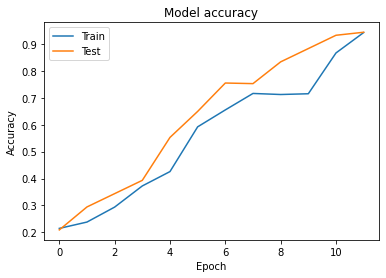

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='best')
plt.show()

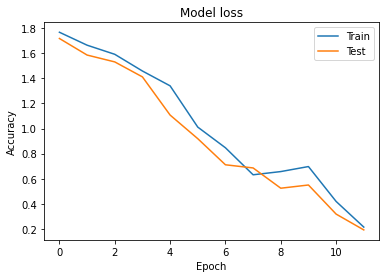

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='best')
plt.show()